<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li><li><span><a href="#" data-toc-modified-id="-6"><span class="toc-item-num">6&nbsp;&nbsp;</span></a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


pd.options.display.max_rows = 100
STATE = 5555

In [2]:
def get_data_info(data):
    display(data.head(5))
    print('_'*50)
    display(data.sample(5))
    print('_'*50)
    display(data.tail(5))
    print('_'*50)
    display(data.info())
    print('_'*50)
    display(data.describe(include='all'))
    print('_'*50)
    print('Количество количество дубликатов', data.duplicated().sum())

In [3]:
df = pd.read_csv('/datasets/insurance.csv')

In [4]:
get_data_info(df)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


__________________________________________________


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
709,0,37.0,39900.0,0,0
3978,0,24.0,36300.0,0,0
3152,1,25.0,42200.0,0,0
192,0,21.0,37600.0,1,0
2800,1,30.0,42300.0,1,0


__________________________________________________


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0
4999,1,28.0,40600.0,1,0


__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

__________________________________________________


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


__________________________________________________
Количество количество дубликатов 153


Убирать дубликаты не будем, т.к. нет никаких индификаторов клиентов и мы не можем 100% пологать, что это истенные дубликаты.

<AxesSubplot:>

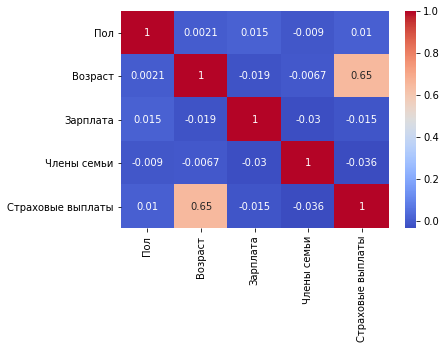

In [5]:
correlations = df.corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')

Заметна средняя корреляция возраста и страховых выплат

Вывод:

Загрузили, изучили и подготовили данные к работе. 

В данных заметна средняя корреляция возраста и страховых выплат

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$


**Ответ:** Не изменится

**Обоснование:**

Запишем новое представление матрицы признаков с учетом умножения на обратную матрицу:
$$Z = XP$$

Предсказания: $A = ZW$

Формула обучения: $W = (Z^T Z)^{-1} Z^T y$

где $W$ - вектор весов.

Подставим значение $Z$ в формулу обучения и преобразуем ее:

$$W = (Z^T Z)^{-1} Z^T y$$

$$W = (P^TX^TXP)^{-1} P^TX^T y$$

$$W = (P^T(X^TX)P)^{-1} P^TX^T y$$

$$W = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty$$

По свойству транспонирования матрицы:

$$(P^T)^T = P$$

$$(P^{-1})^T = (P^T)^{-1}$$

Подставим полученные значения в формулу вектора весов линейной регрессии:

$$W = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty$$

$$W = P^{-1}(X^TX)^{-1}X^Ty$$

Таким образом, формула для вектора весов линейной регрессии при использовании преобразованной матрицы признаков будет иметь вид:

$$W = P^{-1}w$$

где $w = (X^TX)^{-1}X^Ty$

Подставим полученное значение вектора весов линейной регрессии в формулу предсказаний:

$$A = ZW = XP(P^{-1}w) = Xw$$

Таким образом, ответ на вопрос будет: предсказания линейной регрессии не изменятся, так как новое представление матрицы признаков $Z = XP$ не влияет на формулу предсказаний $A=Xw$.

Вывод:

Исходная формула вектора предсказаний равна формуле вектора предсказаний с  умножением на обратимую матрицу. 

Качество линейной регрессии не изменится.

## Алгоритм преобразования

Алгоритм шифрования данных путем умножения матрицы признаков на обратимую случайно сгенерированную матрицу той же размерности:

* Сгенерировать случайную матрицу той же размерности, что и исходная матрица признаков.

* Проверить, что сгенерированная матрица обратима

* Умножить матрицу признаков на сгенерированную матрицу, чтобы получить зашифрованные данные.

* Сохранить сгенерированную матрицу вместе с зашифрованными данными, чтобы иметь возможность расшифровать исходные данные в будущем.

Алгоритм расшифровки будет следующим:

* Использовать сохраненную сгенерированную матрицу для вычисления обратной матрицы с помощью функции `numpy.linalg.inv()`.

* Умножить зашифрованные данные на обратную матрицу, чтобы получить исходные данные.

Вывод:

Алгоритм не создаст различий в предсказаниях при использовании исходных и преобразованных данных. Следовательно, качество предсказаний модели не ухудшится.

In [6]:
features = df.drop(['Страховые выплаты'], axis=1)
target = df['Страховые выплаты']

## Проверка алгоритма

Создадим класс шифровщика/дешифровщика

In [7]:
class Encryptor:

    def encrypt(self, data):
        columns = data.columns
        r = np.random.RandomState(STATE)
        while True:
            self.crypto_matrix = r.randn(4, 4)
            if np.linalg.det(self.crypto_matrix) != 0:
                break
        encrypted_features = data @ self.crypto_matrix
        encrypted_features.columns = columns
        return encrypted_features


    def decrypt(self, encrypted_data):
        columns = encrypted_data.columns
        crypto_matrix_inv = np.linalg.inv(self.crypto_matrix)
        decrypted_data = encrypted_data @ crypto_matrix_inv
        decrypted_data[np.abs(decrypted_data) < 1e-10] = 0
        decrypted_data.columns = columns
        return decrypted_data

Создадим класс линейной регрессии

In [8]:
class _LinearRegression:
    def fit(self, features_train, target_train):
        X = np.concatenate((np.ones((features_train.shape[0], 1)), features_train), axis=1)
        y = target_train
        w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
        self.w = w[1:]
        self.w0 = w[0]
        return self

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Проверим работу шифровщика/дешифровщика

In [9]:
encryptor = Encryptor()
crypto_features = encryptor.encrypt(features)
print(crypto_features.head())

            Пол       Возраст      Зарплата   Члены семьи
0 -42481.673227  84135.317005 -41591.574181  29827.863417
1 -32545.419744  64458.233833 -31856.797973  22861.551738
2 -17983.945493  35622.140213 -17603.150313  12637.907393
3 -35721.457731  70731.201140 -34971.993259  25063.559646
4 -22351.326041  44274.661190 -21883.726722  15702.164946


In [10]:
decrypted_features = encryptor.decrypt(crypto_features)
print(decrypted_features.head())

   Пол  Возраст  Зарплата  Члены семьи
0  1.0     41.0   49600.0          1.0
1  0.0     46.0   38000.0          1.0
2  0.0     29.0   21000.0          0.0
3  0.0     21.0   41700.0          2.0
4  1.0     28.0   26100.0          0.0


Класс работает правильно

In [11]:
# Разделим исходные признаки на обучащую и тестовую выборки 
features_train, features_test, target_train, target_test = train_test_split(
    features,
    target,
    test_size=0.25,
    random_state=STATE
)

# Разделим преобразованные признаки на обучащую и тестовую выборки 
crypto_ftrain, crypto_ftest, crypto_ttrain, crypto_ttest = train_test_split(
    crypto_features,
    target,
    test_size=0.25,
    random_state=STATE
)

In [12]:
# Посмотрим размер выборок
print(f'Размер features_train:{features_train.shape}')
print(f'Размер target_train:{target_train.shape}')

print(f'Размер features_test:{features_test.shape}')
print(f'Размер target_test:{target_test.shape}')

Размер features_train:(3750, 4)
Размер target_train:(3750,)
Размер features_test:(1250, 4)
Размер target_test:(1250,)


In [13]:
# Обучим модель на исходных данных
model1 = _LinearRegression().fit(features_train, target_train)
predict1 = model1.predict(features_test)
r2_features = r2_score(target_test, predict1)

In [14]:
# Обучим модель на преобразованных данных
model2 = _LinearRegression().fit(crypto_ftrain, crypto_ttrain)
predict2 = model2.predict(crypto_ftest)
r2_crypto_features = r2_score(crypto_ttest, predict2)

In [15]:
print('R2 исходных данных:', r2_features)
print('R2 преобразованных данных:', r2_crypto_features)

R2 исходных данных: 0.407936937008453
R2 преобразованных данных: 0.40793634066285833


Вывод:

R2 исходных данных: 0.4079369370084457

R2 преобразованных данных: 0.40793693700672906

Качество Линейной Регрессии не изменяется.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования